In [3]:
%matplotlib inline

In [156]:
import numpy as np
import matplotlib.pyplot as plt
import glob as glob
import scipy.signal as signal
import numpy.fft as fft
basedir=('/Users/ewallwic/Dropbox_MIT/Science/simulations-hera-eox/'
         'data/simulations/')

In [157]:
def loadsim(simdir):
    data=np.load(glob.glob(basedir+simdir+'/*')[0]+'/simdata/simvis.npz')
    return data

In [158]:
vivaldi_integrals=np.load(basedir+'Vivaldi_Beams/Vivaldi-Gain_integrals.npy')
sinuous_integrals=np.load(basedir+'Sinuous_Beams/beamSinuous_gr_0.5_r175_band_skirt_0.3_backplane_50_integrals.npy')
highband_integrals=np.load(basedir+'Beams_HighBand/beamSouthAfricaFeedOverDish_integrals.npy')

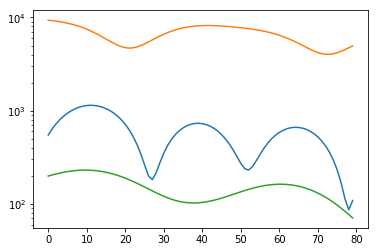

In [159]:
blind=0
plt.plot(np.abs(vivaldi_z6['skyvis_freq'][blind,:,0]))
plt.plot(np.abs(sinuous_z6['skyvis_freq'][blind,:,0]))
plt.plot(np.abs(highband_z6['skyvis_freq'][blind,:,0]))
plt.yscale('log')


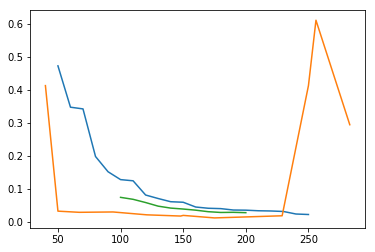

In [160]:
plt.plot(vivaldi_integrals[:,0],vivaldi_integrals[:,1],label='Vivaldi')
plt.plot(sinuous_integrals[:,0],sinuous_integrals[:,1],label='Sinuous')
plt.plot(highband_integrals[:,0],highband_integrals[:,1],label='HERA')

In [198]:
def loadsims(z):
    zstr='%02d'%(z)
    vivaldi=loadsim('hera_19_vivaldi_z%s'%zstr)
    highband=loadsim('hera_19_highband_z%s'%zstr)
    sinuous=loadsim('hera_19_sinuous_gr_0.5_bh_50_z%s'%zstr)
    return vivaldi,sinuous,highband
def loadsims_lst0(z):
    assert z==8
    zstr='%02d'%(z)
    vivaldi=loadsim('hera_19_vivaldi_z%s_lst0'%zstr)
    highband=loadsim('hera_19_highband_z%s_lst0'%zstr)
    sinuous=loadsim('hera_19_sinuous_gr_0.5_bh_50_z%s_lst0'%zstr)
    return vivaldi,sinuous,highband
def loadsims_lst0_ps(z):
    assert z==8
    zstr='%02d'%(z)
    vivaldi=loadsim('hera_19_vivaldi_z%s_lst0_pointsource'%zstr)
    highband=loadsim('hera_19_highband_z%s_lst0_pointsource'%zstr)
    sinuous=loadsim('hera_19_sinuous_gr_0.5_bh_50_z%s_lst0_pointsource'%zstr)
    return vivaldi,sinuous,highband

In [179]:
def findind(array,value):
    return (np.abs(array-value)).argmin()
def delaytransform(x,y):
    w=signal.blackmanharris(len(y))
    return (fft.fftshift(fft.fftfreq(len(x),x[1]-x[0]))
                        ,fft.fftshift(fft.ifft(fft.fftshift(y*w))))
def plotz(z0,blind,sq=False,ft=False):
    if sq:
        vexp=2.
        intind=2
    else:
        vexp=1.
        intind=1
    vivsim,sinsim,hersim=loadsims(z0)
    xviv,yviv=vivsim['freq'],vivsim['skyvis_freq'][blind,:,0]
    xsin,ysin=sinsim['freq'],sinsim['skyvis_freq'][blind,:,0]
    xher,yher=hersim['freq'],hersim['skyvis_freq'][blind,:,0]
    if ft:
        xviv,yviv=delaytransform(vivsim['freq'],
                                 vivsim['skyvis_freq'][blind,:,0])
        xsin,ysin=delaytransform(sinsim['freq'],
                                 sinsim['skyvis_freq'][blind,:,0])
        xher,yher=delaytransform(hersim['freq'],
                                 hersim['skyvis_freq'][blind,:,0])
        xviv*=1e9
        xsin*=1e9
        xher*=1e9
    else:
        xviv/=1e6
        xsin/=1e6
        xher/=1e6
    cf=1420.41/(z0+1)
    sa_vivaldi=vivaldi_integrals[findind(vivaldi_integrals[:,0],cf),intind]
    sa_sinuous=sinuous_integrals[findind(sinuous_integrals[:,0],cf),intind]
    sa_highband=highband_integrals[findind(highband_integrals[:,0],cf),intind]
    print sa_vivaldi
    print sa_sinuous
    print sa_highband
    fig=plt.figure()
    ax1=fig.add_axes([.1,.1,.4,.8])
    ax2=fig.add_axes([.5,.1,.4,.8])
    
    ax1.plot(xviv,
             np.abs(yviv)**vexp,
             label='Vivaldi',lw=5)
    ax1.plot(xsin,
             np.abs(ysin)**vexp,
             label='Sinuous',lw=5)
    ax1.plot(xher,
             np.abs(yher)**vexp,
             label='HERA',lw=5)
    ax1.set_yscale('log')
    ax1.set_title('V',fontsize=18)

    l1=ax2.plot(xviv,
                np.abs(yviv)**vexp/sa_vivaldi,
                label='Vivaldi',lw=5)
    l2=ax2.plot(xsin,
                np.abs(ysin)**vexp/sa_sinuous,
                label='Sinuous',lw=5)
    l3=ax2.plot(xher,
                np.abs(yher)**vexp/sa_highband,
                label='HERA',lw=5)
    ax2.set_yscale('log')
    ax2.set_title('V/$\\Omega$',fontsize=18)
    ax2.grid()
    ax1.grid()
    if ft:
        if sq:
            ax1.set_ylim(1e-5,1e8)
            ax2.set_ylim(1e-5,1e8)
        else:
            ax1.set_ylim(1e0,1e5)
            ax2.set_ylim(1e0,1e5)
    else:
        if not sq:
            ax1.set_ylim(1e1,1e6)
            ax2.set_ylim(1e1,1e6)
        else:
            ax1.set_ylim(1e1,1e10)
            ax2.set_ylim(1e1,1e10)
    ax2.set_yticklabels([])
    if not ft:
        ax2.set_xlabel('f (MHz)',fontsize=18)
        ax1.set_xlabel('f (MHz)',fontsize=18)
    else:
        ax2.set_xlabel('t (ns)',fontsize=18)
        ax1.set_xlabel('t (ns)',fontsize=18)
    ax1.set_ylabel('|V($\\nu$)| (Jy)',fontsize=18)
    fig.set_size_inches(17,8)
    fig.legend((l1[0],l2[0],l3[0]),
               ('Vivaldi','Sinuous','HERA'),
               ncol=3,loc='upper center',fontsize=18)
    ax1.tick_params('x',labelsize=18)
    ax2.tick_params('x',labelsize=18)

0.0347984981611
0.0177755848637
0.0272245834144


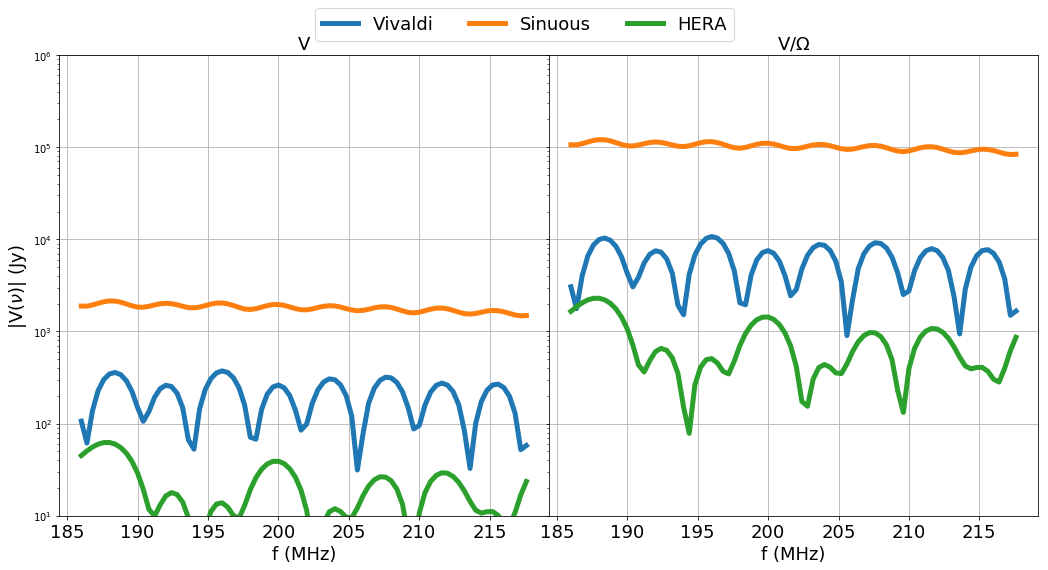

In [180]:
plotz(6,10)

0.0123216397086
0.00313554005512
0.0126541438874


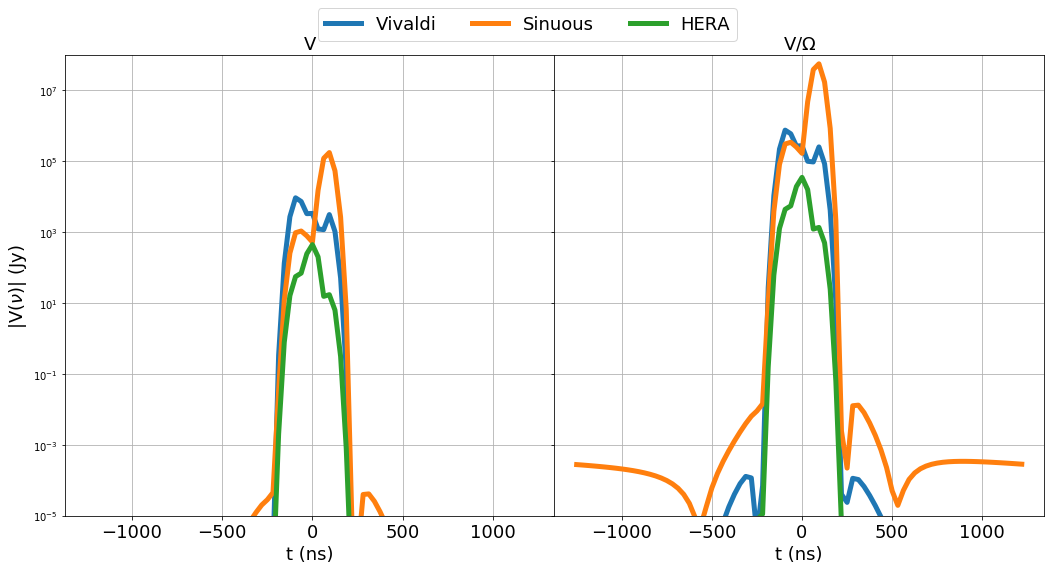

In [181]:
plotz(6,4,sq=True,ft=True)

In [182]:
def findind(array,value):
    return (np.abs(array-value)).argmin()
def delaytransform(x,y):
    w=signal.blackmanharris(len(y))
    return (fft.fftshift(fft.fftfreq(len(x),x[1]-x[0]))
                        ,fft.fftshift(fft.ifft(fft.fftshift(y*w))))
def plotz_lst0(z0,blind,sq=False,ft=False):
    if sq:
        vexp=2.
        intind=2
    else:
        vexp=1.
        intind=1
    vivsim,sinsim,hersim=loadsims_lst0(z0)
    xviv,yviv=vivsim['freq'],vivsim['skyvis_freq'][blind,:,0]
    xsin,ysin=sinsim['freq'],sinsim['skyvis_freq'][blind,:,0]
    xher,yher=hersim['freq'],hersim['skyvis_freq'][blind,:,0]
    if ft:
        xviv,yviv=delaytransform(vivsim['freq'],
                                 vivsim['skyvis_freq'][blind,:,0])
        xsin,ysin=delaytransform(sinsim['freq'],
                                 sinsim['skyvis_freq'][blind,:,0])
        xher,yher=delaytransform(hersim['freq'],
                                 hersim['skyvis_freq'][blind,:,0])
        xviv*=1e9
        xsin*=1e9
        xher*=1e9
    else:
        xviv/=1e6
        xsin/=1e6
        xher/=1e6
    cf=1420.41/(z0+1)
    sa_vivaldi=vivaldi_integrals[findind(vivaldi_integrals[:,0],cf),intind]
    sa_sinuous=sinuous_integrals[findind(sinuous_integrals[:,0],cf),intind]
    sa_highband=highband_integrals[findind(highband_integrals[:,0],cf),intind]
    print sa_vivaldi
    print sa_sinuous
    print sa_highband
    fig=plt.figure()
    ax1=fig.add_axes([.1,.1,.4,.8])
    ax2=fig.add_axes([.5,.1,.4,.8])
    
    ax1.plot(xviv,
             np.abs(yviv)**vexp,
             label='Vivaldi',lw=5)
    ax1.plot(xsin,
             np.abs(ysin)**vexp,
             label='Sinuous',lw=5)
    ax1.plot(xher,
             np.abs(yher)**vexp,
             label='HERA',lw=5)
    ax1.set_yscale('log')
    ax1.set_title('V',fontsize=18)

    l1=ax2.plot(xviv,
                np.abs(yviv)**vexp/sa_vivaldi,
                label='Vivaldi',lw=5)
    l2=ax2.plot(xsin,
                np.abs(ysin)**vexp/sa_sinuous,
                label='Sinuous',lw=5)
    l3=ax2.plot(xher,
                np.abs(yher)**vexp/sa_highband,
                label='HERA',lw=5)
    ax2.set_yscale('log')
    ax2.set_title('V/$\\Omega$',fontsize=18)
    ax2.grid()
    ax1.grid()
    if ft:
        if sq:
            ax1.set_ylim(1e-5,1e8)
            ax2.set_ylim(1e-5,1e8)
        else:
            ax1.set_ylim(1e0,1e5)
            ax2.set_ylim(1e0,1e5)
    else:
        if not sq:
            ax1.set_ylim(1e1,1e6)
            ax2.set_ylim(1e1,1e6)
        else:
            ax1.set_ylim(1e1,1e10)
            ax2.set_ylim(1e1,1e10)
    ax2.set_yticklabels([])
    if not ft:
        ax2.set_xlabel('f (MHz)',fontsize=18)
        ax1.set_xlabel('f (MHz)',fontsize=18)
    else:
        ax2.set_xlabel('t (ns)',fontsize=18)
        ax1.set_xlabel('t (ns)',fontsize=18)
    ax1.set_ylabel('|V($\\nu$)| (Jy)',fontsize=18)
    fig.set_size_inches(17,8)
    fig.legend((l1[0],l2[0],l3[0]),
               ('Vivaldi','Sinuous','HERA'),
               ncol=3,loc='upper center',fontsize=18)
    ax1.tick_params('x',labelsize=18)
    ax2.tick_params('x',labelsize=18)

0.0152276743531
0.00238756217026
0.0170374327543


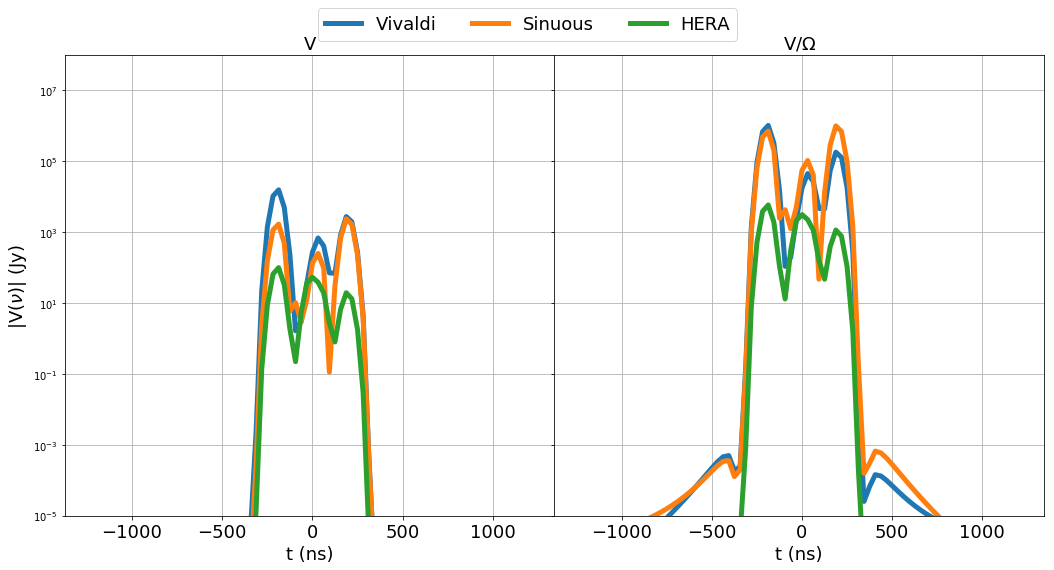

In [195]:
plotz_lst0(8,28,sq=True,ft=True)

In [201]:
def findind(array,value):
    return (np.abs(array-value)).argmin()
def delaytransform(x,y):
    w=signal.blackmanharris(len(y))
    return (fft.fftshift(fft.fftfreq(len(x),x[1]-x[0]))
                        ,fft.fftshift(fft.ifft(fft.fftshift(y*w))))
def plotz_lst0_ps(z0,blind,sq=False,ft=False):
    if sq:
        vexp=2.
        intind=2
    else:
        vexp=1.
        intind=1
    vivsim,sinsim,hersim=loadsims_lst0_ps(z0)
    xviv,yviv=vivsim['freq'],vivsim['skyvis_freq'][blind,:,0]
    xsin,ysin=sinsim['freq'],sinsim['skyvis_freq'][blind,:,0]
    xher,yher=hersim['freq'],hersim['skyvis_freq'][blind,:,0]
    if ft:
        xviv,yviv=delaytransform(vivsim['freq'],
                                 vivsim['skyvis_freq'][blind,:,0])
        xsin,ysin=delaytransform(sinsim['freq'],
                                 sinsim['skyvis_freq'][blind,:,0])
        xher,yher=delaytransform(hersim['freq'],
                                 hersim['skyvis_freq'][blind,:,0])
        xviv*=1e9
        xsin*=1e9
        xher*=1e9
    else:
        xviv/=1e6
        xsin/=1e6
        xher/=1e6
    cf=1420.41/(z0+1)
    sa_vivaldi=vivaldi_integrals[findind(vivaldi_integrals[:,0],cf),intind]
    sa_sinuous=sinuous_integrals[findind(sinuous_integrals[:,0],cf),intind]
    sa_highband=highband_integrals[findind(highband_integrals[:,0],cf),intind]
    print sa_vivaldi
    print sa_sinuous
    print sa_highband
    fig=plt.figure()
    ax1=fig.add_axes([.1,.1,.4,.8])
    ax2=fig.add_axes([.5,.1,.4,.8])
    
    ax1.plot(xviv,
             np.abs(yviv)**vexp,
             label='Vivaldi',lw=5)
    ax1.plot(xsin,
             np.abs(ysin)**vexp,
             label='Sinuous',lw=5)
    ax1.plot(xher,
             np.abs(yher)**vexp,
             label='HERA',lw=5)
    ax1.set_yscale('log')
    ax1.set_title('V',fontsize=18)

    l1=ax2.plot(xviv,
                np.abs(yviv)**vexp/sa_vivaldi,
                label='Vivaldi',lw=5)
    l2=ax2.plot(xsin,
                np.abs(ysin)**vexp/sa_sinuous,
                label='Sinuous',lw=5)
    l3=ax2.plot(xher,
                np.abs(yher)**vexp/sa_highband,
                label='HERA',lw=5)
    ax2.set_yscale('log')
    ax2.set_title('V/$\\Omega$',fontsize=18)
    ax2.grid()
    ax1.grid()
    if ft:
        if sq:
            ax1.set_ylim(1e-5,1e8)
            ax2.set_ylim(1e-5,1e8)
        else:
            ax1.set_ylim(1e0,1e5)
            ax2.set_ylim(1e0,1e5)
    else:
        if not sq:
            ax1.set_ylim(1e1,1e6)
            ax2.set_ylim(1e1,1e6)
        else:
            ax1.set_ylim(1e1,1e10)
            ax2.set_ylim(1e1,1e10)
    ax2.set_yticklabels([])
    if not ft:
        ax2.set_xlabel('f (MHz)',fontsize=18)
        ax1.set_xlabel('f (MHz)',fontsize=18)
    else:
        ax2.set_xlabel('t (ns)',fontsize=18)
        ax1.set_xlabel('t (ns)',fontsize=18)
    ax1.set_ylabel('|V($\\nu$)| (Jy)',fontsize=18)
    fig.set_size_inches(17,8)
    fig.legend((l1[0],l2[0],l3[0]),
               ('Vivaldi','Sinuous','HERA'),
               ncol=3,loc='upper center',fontsize=18)
    ax1.tick_params('x',labelsize=18)
    ax2.tick_params('x',labelsize=18)

0.0152276743531
0.00238756217026
0.0170374327543


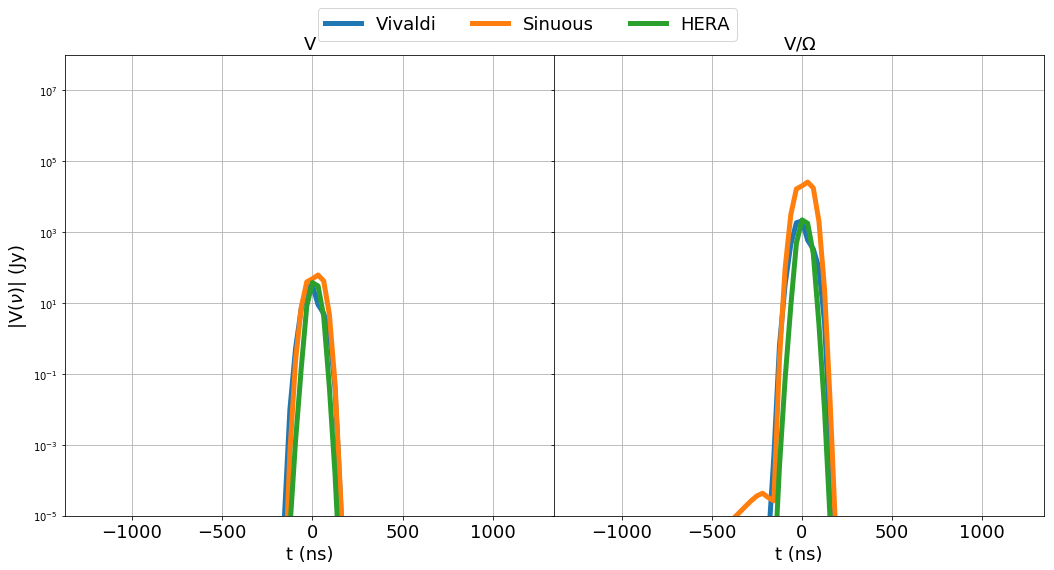

In [204]:
plotz_lst0_ps(8,2,sq=True,ft=True)

0.0152276743531
0.00238756217026
0.0170374327543


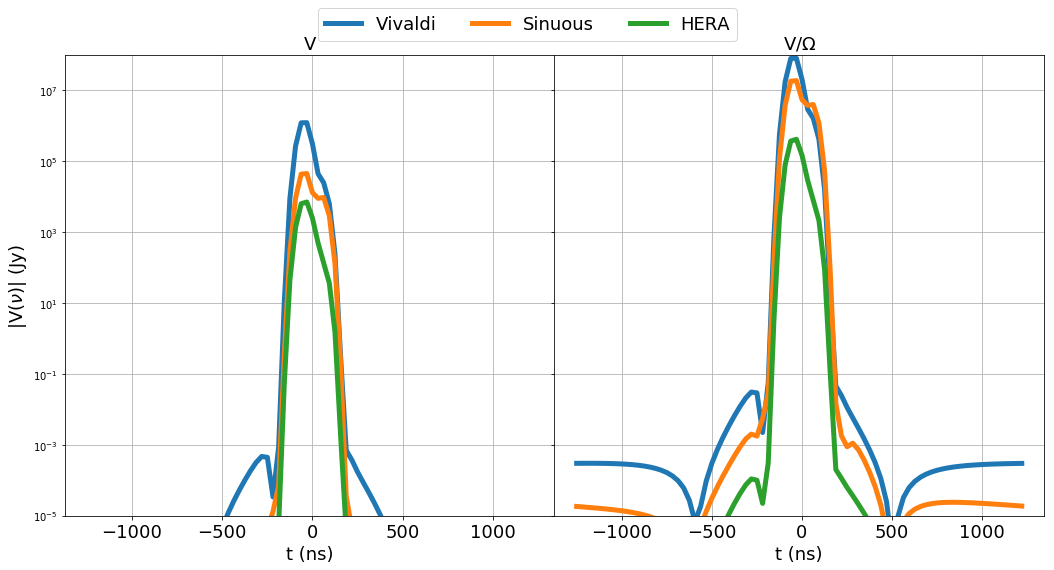

In [205]:
plotz_lst0(8,2,sq=True,ft=True)